In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import talib
from sklearn.cluster import KMeans

In [2]:
# set path for your .csv file
path = 'TYPE YOUR PATH HERE'
#path = '/Users/junenyjune/Documents/1_Research/22_My own projects/Project with Poon/Ariticle/3_Kmean clustering and creating a simple trading rule for smoother returns'

## Get data 

In [3]:
def get_data(sym):
    df_raw = pd.read_csv(path + '/' + str(sym) +'.csv', index_col=0, parse_dates=True)
    df = df_raw.copy()
    df['Volume'] = df['Volume'] / df['Volume'].rolling(20).mean()
    df['Rng'] = (df['High'] - df['Low']) / talib.ATR(df.High.values,df.Low.values,df.Close.values,20)
    df['Ret'] = df.Open.shift(-2) - df.Open.shift(-1)
    df['Tar'] = 0
    df.dropna(inplace=True)
    return df_raw, df

In [4]:
# ------------------------------------
# Split into Test and Train
#
# Train until 2014
# Test from 2015 onward
# ------------------------------------

df_raw, df = get_data('SET50')
df_train = df[df.index <= datetime(2015,1,1)]
df_test  = df[df.index > datetime(2015,1,1)]

In [5]:
df_train.head()

,Open,High,Low,Close,Volume,Rng,Ret,Tar
Date,,,,,,,,
2001-10-12,188.6,188.6,185.9,186.1,1.019831,0.554415,-1.9,0
2001-10-15,186.4,186.4,182.4,183.8,0.998129,0.828758,1.1,0
2001-10-16,184.5,185.5,184.1,184.8,0.990848,0.299775,0.8,0
2001-10-17,185.6,188.1,185.4,188.0,1.014608,0.586744,0.9,0
2001-10-18,186.4,188.8,185.7,186.6,1.009651,0.684843,-1.9,0


## Training

In [6]:
# ------------------------------------
#  K Means - Training
# ------------------------------------
X = df_train[['Volume','Rng']]
kmeans = KMeans(n_clusters=3).fit(X)
y_kmeans_train = kmeans.predict(X)
df_train['Tar'] = y_kmeans_train

/Users/junenyjune/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


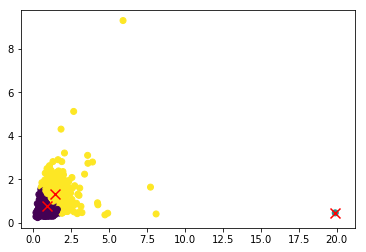

In [7]:
# --------------------------
#  Plot Training
# --------------------------

centers = kmeans.cluster_centers_
plt.scatter(df_train['Volume'],df_train['Rng'], c=y_kmeans_train)
plt.scatter(centers[:,0],centers[:,1],c='red',s=100,marker='x')
plt.show()

## Testing

In [8]:
# -------------------------------
#  K Means - Testing
# -------------------------------

x = df_test[['Volume','Rng']]
y_kmeans_test = kmeans.predict(x)
df_test['Tar'] = y_kmeans_test

/Users/junenyjune/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


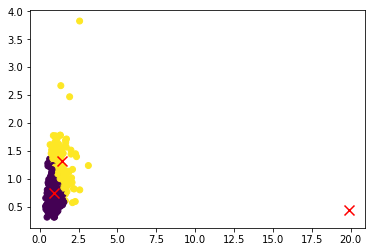

In [9]:
# --------------------------------
#  Plot Testing
#
plt.scatter(df_test['Volume'],df_test['Rng'],c=y_kmeans_test)
plt.scatter(centers[:,0],centers[:,1],c='red',s=100,marker='x')
plt.show()

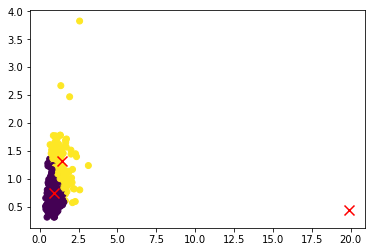

In [10]:
# --------------------------
#  Plot Training & testing
# --------------------------

centers = kmeans.cluster_centers_
plt.scatter(df_test['Volume'],df_test['Rng'],c=y_kmeans_test)
plt.scatter(centers[:,0],centers[:,1],c='red',s=100,marker='x')
plt.show()

## If we trade in the next day based on the current day's cluster

In [11]:
# ------------------------------------------
#  Compare Training and Testing
#
print("Total Points Earned by Cluster Prediction")

print("Cluster 1 Train: %.2f\tCluster 1 Test: %2.f" % (df_train['Ret'].loc[df_train['Tar'] == 0].sum(),df_test['Ret'].loc[df_test['Tar'] == 0].sum()))

print("Cluster 2 Train: %.2f\tCluster 2 Test: %.2f" % (df_train['Ret'].loc[df_train['Tar'] == 1].sum(),df_test['Ret'].loc[df_test['Tar'] == 1].sum()))

print("Cluster 3 Train: %.2f\tCluster 3 Test: %.2f" % (df_train['Ret'].loc[df_train['Tar'] == 2].sum(),df_test['Ret'].loc[df_test['Tar'] == 2].sum()))

Total Points Earned by Cluster Prediction
Cluster 1 Train: 603.02	Cluster 1 Test: -103
Cluster 2 Train: -5.57	Cluster 2 Test: 0.00
Cluster 3 Train: 190.90	Cluster 3 Test: 105.24


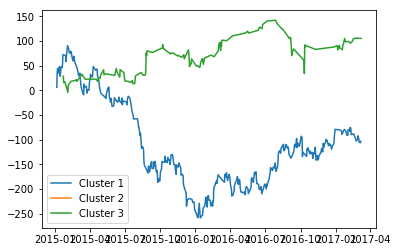

In [12]:
# ------------------------------
#  Equity Curves
#
plt.plot(np.cumsum(df_test['Ret'].loc[df_test['Tar'] == 0]),label='Cluster 1')
plt.plot(np.cumsum(df_test['Ret'].loc[df_test['Tar'] == 1]),label='Cluster 2')
plt.plot(np.cumsum(df_test['Ret'].loc[df_test['Tar'] == 2]),label='Cluster 3')
plt.legend()
plt.show()
